# Julia Set Plotting Extension

Load module for a JuliaSet that conforms to the specified interface.

It is wise to run the test suite in `test_juliaset.py` with `nosetests` prior to attempting to plot here.

In [1]:
from juliaset import JuliaSet

Load additional libraries needed for plotting and profiling.

In [2]:
# Math libraries
import numpy as np
from math import sqrt

# Matplotlib plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

# Bokeh plotting libraries
import bokeh.plotting as blt
blt.output_notebook()

Loading BokehJS ...

Extend JuliaSet class with additional functionality.

In [3]:
class JuliaSetPlot(JuliaSet):
    """Extend JuliaSet to add plotting functionality"""
    
    def __init__(self, *args, **kwargs):
        # Invoke constructor for JuliaSet first, unaltered
        super(JuliaSetPlot, self).__init__(*args, **kwargs)
        # Add one more attribute: a rendered image array
        self.img = np.array([])
    
    def get_dim(self):
        # get what should be an attribute
        return int(4.0 / self._d)
    
    def render(self):
        if not self.set: self.generate()
        # Convert inefficient list to efficient numpy array
        self.img = np.array(self.set)
        dim = self.get_dim()
        # Reshape array into a 2d complex plane
        self.img = np.reshape(self.img, (dim,dim)).T
        
    def show(self):
        if not self.img.size: self.render()
        # Specify complex plane axes efficiently
        xy = np.linspace(-2,2,self.get_dim())
        # Use matplotlib to plot image as an efficient mesh
        plt.figure(1, figsize=(12,9))
        plt.pcolormesh(xy,xy,self.img, cmap=plt.cm.hot)
        plt.colorbar()
        plt.show()
        
    def interact(self):
        from matplotlib.colors import rgb2hex
        if not self.img.size: self.render()
        # Mimic matplotlib "hot" color palette
        colormap = plt.cm.get_cmap("hot")
        bokehpalette = [rgb2hex(m) for m in colormap(np.arange(colormap.N))]
        # Use bokeh to plot an interactive image
        f = blt.figure(x_range=[-2,2], y_range=[-2,2], plot_width=600, plot_height=600)
        f.image(image=[j.img], x=[-2,2], y=[-2,2], dw=[4], dh=[4], palette=bokehpalette)
        blt.show(f)

Visualize a Julia set using matplotlib.

CPU times: user 102 ms, sys: 7.26 ms, total: 109 ms
Wall time: 106 ms


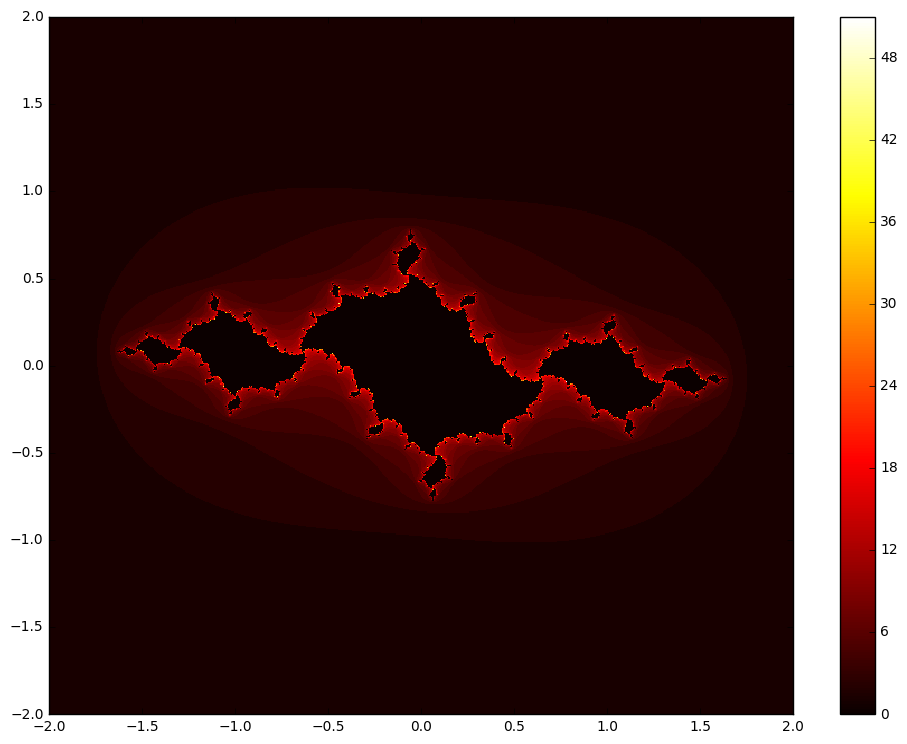

CPU times: user 2.73 s, sys: 42.8 ms, total: 2.77 s
Wall time: 2.81 s


In [4]:
j = JuliaSetPlot(-1.037 + 0.17j)
%time j.set_spacing(0.006)
%time j.show()

Visualize a different Julia set using Bokeh as an interactive Javascript plot.

In [5]:
j = JuliaSetPlot(-0.624 + 0.435j)
%time j.set_spacing(0.006)
%time j.interact()

CPU times: user 91 ms, sys: 15.9 ms, total: 107 ms
Wall time: 105 ms


/ext/sage/sage-8.1/local/lib/python2.7/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('dh', 1), ('image', 1), ('x', 2)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/ext/sage/sage-8.1/local/lib/python2.7/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('dh', 1), ('image', 1), ('x', 2), ('y', 2)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/ext/sage/sage-8.1/local/lib/python2.7/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('dh', 1), ('dw', 1), ('image', 1), ('x', 2), ('y', 2)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [6]:
%prun j.generate()

         9582197 function calls in 5.195 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   443556    3.111    0.000    5.009    0.000 juliaset.py:14(iterate)
  4569319    1.354    0.000    1.354    0.000 juliaset.py:11(juliamap)
  4569319    0.544    0.000    0.544    0.000 {abs}
        1    0.186    0.186    5.195    5.195 juliaset.py:32(generate)
        1    0.000    0.000    5.195    5.195 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [7]:
%load_ext line_profiler
%lprun -f j.generate j.generate()

Timer unit: 1e-06 s

Total time: 9.71265 s
File: juliaset.py
Function: generate at line 32

Line #      Hits         Time  Per Hit   % Time  Line Contents
    32                                               def generate(self):
    33    443557      9712654     21.9    100.0          self.set = [self.iterate(i) for i in self._complexplane]
    34         1            1      1.0      0.0          return self.set